# Miniproject 1 - Machine Learning 101 - Code
## Daniel Borisov, Jonas Lehnert, Jeffrey Hyacinthe
## Part 1: Examining Data Sets
### 1.1 Importing relevant libraries

First, we load all the packages that we require for the assignment (of course omitting sklearn).


In [15]:
import os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from requests import get
import pandas as pd
import logRegressClass as pc
import ldaClass as lc
import math
import timeit
matplotlib.rc('font', size = 8)

Here we simply first load all of the data provided, and examine the distributions of the features. We made a little function to make downloading the data more general.

In [16]:
def downloadData(url, fileToDl):
    # Download data function
    with open(fileToDl, "wb") as f:
        dataf = get(url)
        f.write(dataf.content)

In [17]:
cwd = os.getcwd()
dirPath = os.path.join(cwd, 'DataDir')

redWineUrl = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
cUrl = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

# Create data folder if it does not already exist
if 'DataDir' not in os.listdir(cwd):
    print('Data folder not found; Creating data folder in working directory...')
    os.mkdir(dirPath)
    print(dirPath + ' created')

# Download wine data if it does not already exist
if 'wineSet.csv' not in os.listdir(dirPath):
    print('Wine dataset not found; Downloading wine data...')
    downloadData(redWineUrl, dirPath + '/wineSet.csv')
    if 'wineSet.csv' not in os.listdir(dirPath):
        print('Wine set failed to download. Please manually download from the following link:')
        print(redWineUrl)
    else:
        print('Wine set downloaded')

# Download cancer data if it does not already exist
if 'cancerSet.data' not in os.listdir(dirPath):
    print('Cancer dataset not found; Downloading cancer data...')
    downloadData(cUrl, dirPath + '/cancerSet.data')
    if 'cancerSet.data' not in os.listdir(dirPath):
        print('Cancer set failed to download. Please manually download from the following link:')
        print(cUrl)
    else:
        print('Cancer set downloaded')


### 1.2 Load data into Pandas data-frame, clean data, binarize classification data.
Now that we have down-laoded all the data, we load the data into a pandas dataframe to convert it to a numpy array. We then binarize the quality of the wine column, as well as the cancer categorization data.

In [18]:




# Import wine data set as pandas dataframe
wineData = pd.read_csv(dirPath + '/wineSet.csv', ';')
wineNp = wineData.values
quality = wineData['quality']
qualityNp = quality.values
qualityNp[qualityNp <= 5] = 0
qualityNp[qualityNp > 5] = 1
wineInputsNp = wineNp[:, :-1]
#wineInputsNp = (wineInputsNp - (np.mean(wineInputsNp, axis=0)))/np.std(wineInputsNp, axis=0)
wineY = qualityNp.reshape((-1, 1))

# Cancer data set feature names not defined in file, manually enter names
cancerKeys = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
              'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli',
              'Mitoses', 'Class']

# Import cancer data set as pandas dataframe
cancerData = pd.read_csv(dirPath + '/cancerSet.data', ',', names=cancerKeys, na_values=['?']).fillna(math.nan)


# Drop output and sample code number from feature set

cancerNans = cancerData.applymap(np.isnan).any(1)

cancerFeaturesReal = cancerData[cancerData.columns][~cancerNans]
cancerFeatures = cancerFeaturesReal.drop(['Class', 'Sample code number'],axis=1)
cancerClass = cancerFeaturesReal['Class']  # Get class result of cancer dataset
cancerNp = cancerFeatures.values

# Get numpy arrays of cancer data
classNp = cancerClass.values

# Binarize cancer class
classNp[classNp == 2] = 0
classNp[classNp == 4] = 1

cancerY = classNp.reshape((-1, 1))


# --------------------------------

### 1.3 Examine Distributions of the data, means and standard deviations
We now want to plot the data as histograms to get some idea of what we are dealing with numerically. We also make a box plot to understand how the different features differ in magnitude.

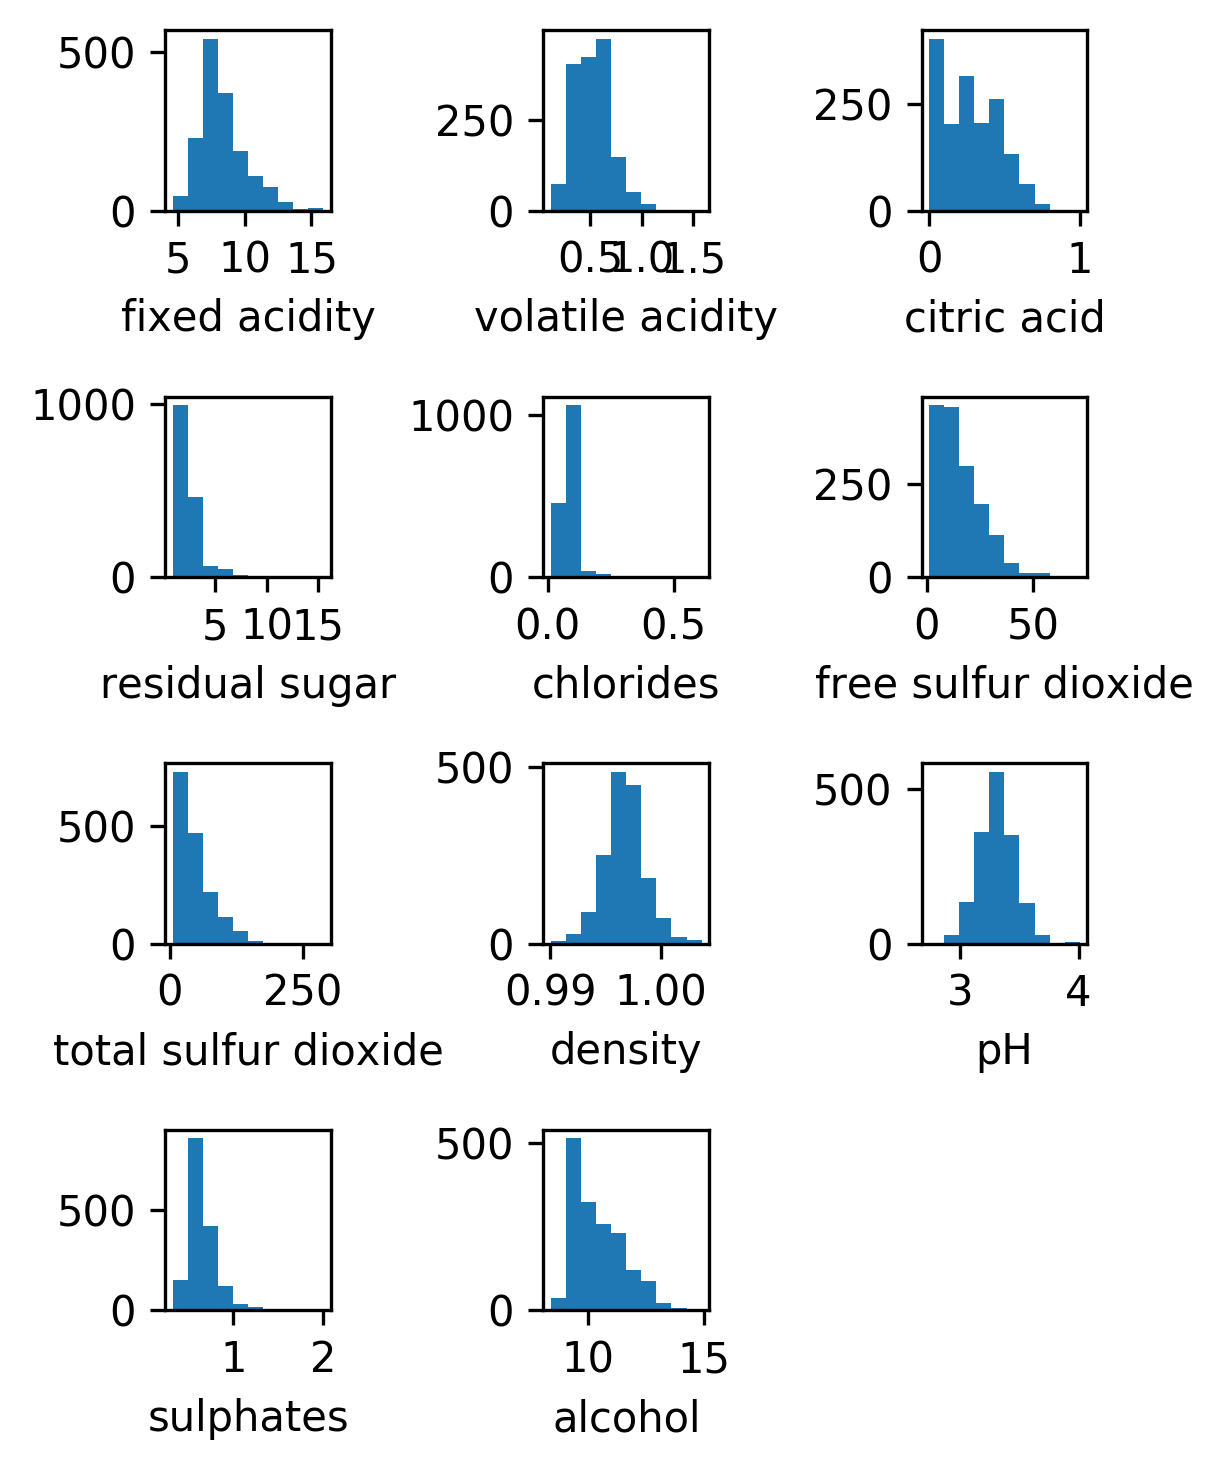

In [5]:
# Plot the distributions of the wine data

fig = plt.figure(figsize=(4, 5),dpi=300)
for i in range(0, np.size(wineInputsNp, 1)):
    plt.subplot(4, 3, i+1)
    plt.hist(wineInputsNp[:, i])
    plt.xlabel(wineData.columns[i])
plt.tight_layout()

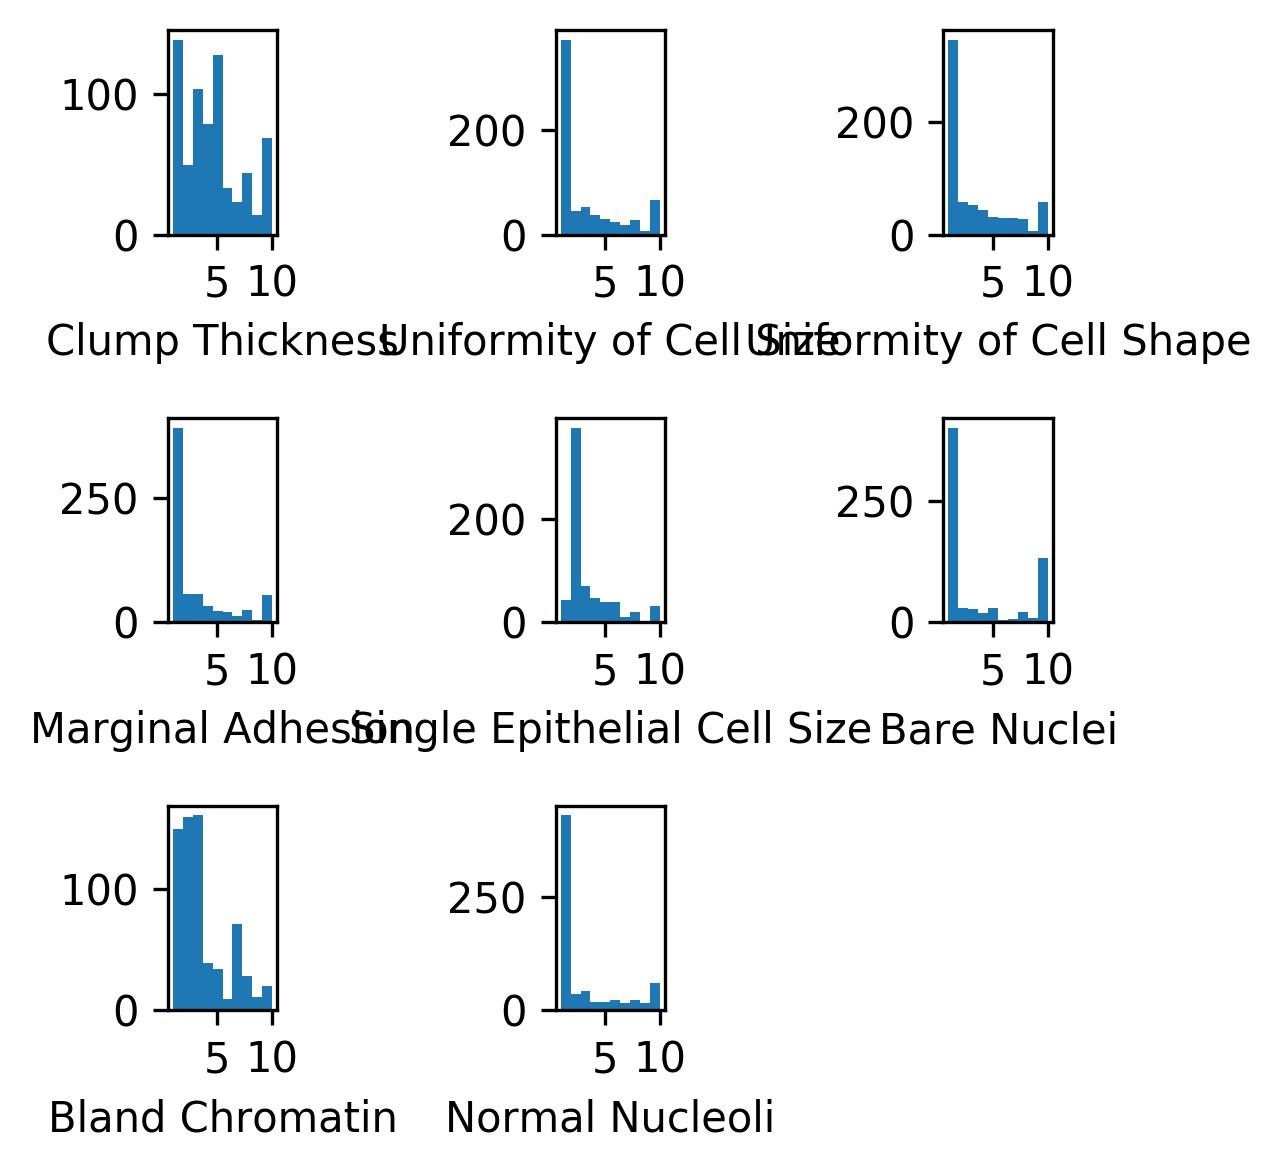

In [6]:
fig = plt.figure(figsize=(4, 4), dpi=300)
for i in range(0, np.size(cancerNp, 1)-1):
    plt.subplot(3, 3, i+1)
    plt.hist(cancerNp[:, i], bins=10)
    plt.xlabel(cancerFeatures.columns[i])
plt.tight_layout()

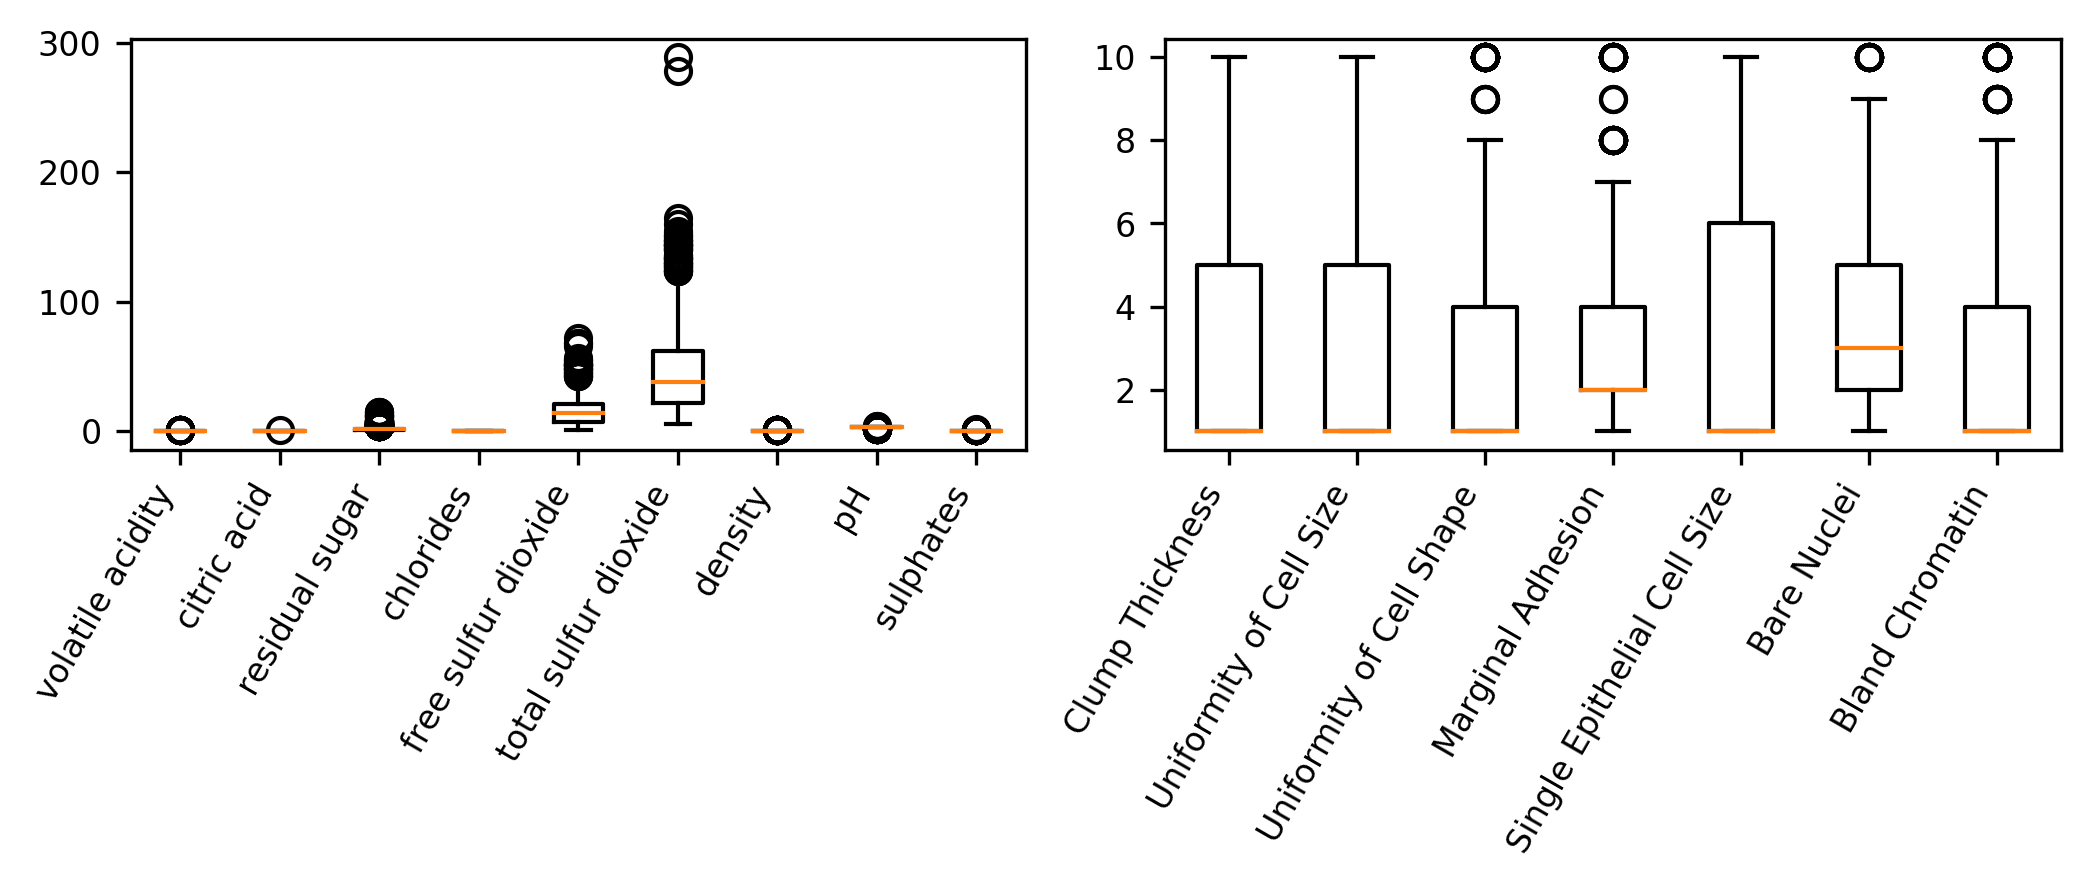

In [19]:
# Plot histogram of categorical data
fig4 = plt.figure(figsize=(7, 3), dpi=300)
#plt.subplot(2, 2, 1)
#plt.hist(qualityNp)
#plt.xlabel('Wine Quality')
#plt.subplot(2, 2, 2)
#plt.hist(classNp)
#plt.xlabel('Cancer Rating')

# Compute mean and std of all the features, then plot them
meanCancer = np.mean(cancerNp.astype(int), 1)
meanWine = np.mean(wineNp, 1)
stdCancer = np.std(cancerNp.astype(int), 1)
stdWine = np.std(wineNp, 1)

#fig4 = plt.figure()
#plt.subplot(1, 2, 1)
ax1 = fig4.add_subplot(1, 2, 1)
plt.boxplot(wineNp[:, :-1].astype(int)[:, 1:-1])
ax1.set_xticklabels(wineData.columns[1:-1], rotation='60', ha = 'right')
plt.tight_layout()

#ax2 = plt.subplot(1, 2, 2)
ax2 = fig4.add_subplot(1, 2, 2)
plt.boxplot(cancerFeatures.values.astype(int)[:, 1:-1])
ax2.set_xticklabels(cancerFeatures.columns, rotation='60', ha = 'right')
plt.tight_layout()

### 1.4 Normalizing the data
We see that the wine data features vary greatly in magnitude. We therefore decided to z-score the data, to help our classification algorithms to converge.

In [20]:
wineInputsNp = (wineInputsNp - (np.min(wineInputsNp, axis=0)))/(np.max(wineInputsNp, axis=0) - np.min(wineInputsNp, axis=0))

cancerNp = (cancerNp - (np.mean(cancerNp, axis=0)))/np.std(cancerNp, axis=0)

## Part 2: Classification Algorithms
### 2.0 Generic Functions


In [21]:
# functions to "modify" the data (square, log etc) transformation
def asis(aX):
    return aX

def squared(aX):
    aX2=np.square(aX)
    jointaX = aX.join(aX2, rsuffix = "_sqr")#pd.concat([aX,aX2], axis=1)#pd.merge(aX, aX2)
    return jointaX

def loged(aX):
    return np.log(aX+1)

def logedplus(aX):
    aX2 = np.log(aX+1)
    jointaX = aX.join(aX2, rsuffix="_log")
    return jointaX

def get_covar(aX, aY):
    classes = [0,1]#pd.unique(aY)#[0, 1]
    #print(aX)
    N = len(aY)
    class_u = pd.DataFrame(columns=classes)
    jointdf = aX.join(pd.Series(aY, name="class"))
    #print(jointdf)
    for i, rows in jointdf.groupby("class"):
        # remove the class
        rows = rows.drop(["class"], axis=1)
        class_u[i] = rows.mean()

    f_size = len(aX.columns)
    Sw = np.zeros((f_size, f_size))
    for i, rows in jointdf.groupby("class"):
        # remove the class
        rows = rows.drop(["class"], axis=1)
        # empty base
        s = np.zeros((f_size, f_size))

        for j, row in rows.iterrows():
            x = row.values.reshape(f_size, 1)
            ux = class_u[i].values.reshape(f_size, 1)

            s += (x - ux).dot((x - ux).T)
        Sw += s

    cova = Sw / (N - 2)
    return cova

def evaluate_acc(aX, aY, tY):
    #t for target

    #print(tY)
    #print (list(aY))
    validity = [int(list(aY)[element] == tY[element]) for element in range(len(aY))]
    #print(validity)
    accuracy = np.mean(validity)
    #print(accuracy)
    return accuracy

### 2.1 Logistic Regression
Next we introduce our classification algorithms as classses. The first of these is the logistic regression algorithm:

In [22]:
class LogisticRegression:

    def __init__(self, nfeatures, decayPerEpoch=1, lam=1):
        self.decayPerEpoch = decayPerEpoch
        self.weights = np.zeros((nfeatures + 1, 1))
        self.nfeatures = nfeatures
        self.lam = lam

    def fit(self, x, y, rate, iterations, lrdecay, reg):
        # x and y is the training data
        # rate is the learning rate
        # iterations are the gradient descent iterations.|
        # featureMatrix = np.matlib.repmat(self.weights, 2, np.size(self.weights))
        x = np.c_[x, np.ones(np.size(x, 0))]
        for i in range(0, iterations):
            if lrdecay:
                rate -= 0.5 * rate * int((i % self.decayPerEpoch) == 0)

            a = np.dot(x, self.weights)
            sigma = 1/(1 + np.exp(-a))

            if reg:
                penalty = self.lam*np.sign(self.weights)
                wNext = self.weights.T + ((rate/self.nfeatures) * np.sum(x * (y - sigma), axis=0)) + penalty.T
                self.weights = wNext.T
            else:
                self.weights += (rate/self.nfeatures) * np.dot(x.T, (y - sigma))

        return self.weights

    def predict(self, x):
        #Predicts y
        #turns probabilities to binary, threshold at 0.5
        x = np.c_[x, np.ones(np.size(x, 0))]
        prediction = np.dot(x, self.weights)
        prediction[prediction < 0.5] = 0
        prediction[prediction >= 0.5] = 1
        return prediction

### 2.2 Linear Discriminant Analysis
The second is the Linear Discriminant Analysis implementation:

In [23]:
import pandas as pd
import numpy as np

class LDA():

    def __init__(self,amF=asis):
        #Only takes the transformation function
        self.model = amF

        #covar4 = np.cov(aX, rowvar=False)
        self.aX = 0
        self.N0 = 0
        self.N1 = 0
        self.P0 = 0 # probablilty of class 0
        self.P1 = 0  # probability of calss 1
        self.COVAR = 0
        self.mean = 0
        self.predict_y = 0
        self.predict_y_bin = 0


        print("")
        #return self

    def fit(self, pX, aY):

        aX = self.model(pX)
        classval = pd.unique(aY)
        #print(classval)
        N0 = aY[aY == 0].count()
        N1 = aY[aY == 1].count()
        P0 = N0 / (N0 + N1 * 1.0)  # probablilty of class 0
        P1 = N1 / (N0 + N1 * 1.0)  # probability of calss 1
        #print(aX)

        COVAR = get_covar(aX,aY)#np.cov(aX, rowvar=False)#
        covarv2 = get_covar(aX, aY)
        mean = {}
        mean[0] = aX.apply(lambda x: sum(x * I(aY[x.index] == 0)) / N0)  # sum(axis = 0)
        mean[1] = aX.apply(lambda x: sum(x * I(aY[x.index] == 1)) / N1)

        self.aX = aX
        self.aY = aY
        self.N0 = N0
        self.N1 = N1
        self.P0 = P0  # probablilty of class 0
        self.P1 = P1  # probability of calss 1
        self.COVAR = COVAR
        self.covar2 = covarv2
        self.mean = mean


    def predict(self, nX):
        P0 =self.P0
        P1 = self.P1
        mean = self.mean
        COVAR = self.COVAR

        inputX = self.model(nX)

        #Predicts y
        predict_y = np.log(P1 / P0) - 1 / 2.0 * (np.dot(mean[1].T, np.linalg.inv(COVAR)).dot(mean[1])) + \
        1 / 2.0 * (np.dot(mean[0].T, np.linalg.inv(COVAR)).dot(mean[0])) + \
        (np.dot(inputX, np.linalg.inv(COVAR)).dot((mean[1] - mean[0])))

        #turns probabilities to binary, treshold at 0.5
        predict_y_bin = (predict_y > 0.5).astype(int)

        self.predict_y = predict_y
        self.predict_y_bin = predict_y_bin
        #print(predict_y_bin)
        return predict_y_bin

    def show(self):
        print("aX:"+str(self.aX))
        print("aY:" + str(self.aY))
        print("N0:" + str(self.N0))
        print("N1:" + str(self.N1))
        print("P0:" + str(self.P0))
        print("P1:" + str(self.P1))
        print("COVAR:" + str(self.COVAR))
        print("covar2:" + str(self.covar2))
        print("Mean:" + str(self.mean))
        print("predict:" + str(self.predict_y))
        print("predict_bin:" + str(self.predict_y_bin))

def I(value):
    return value.astype(int)





### 2.3 K-fold crossvalidation and evaluate_acc()
Next we define our function to perform k-fold crossvalidation, which should work for either model. We have two functions for this. One that we used for Logistic Regression; One that we used for linear discriminant analysis.

In [24]:
# This is the one we use for Logistic Regression
def kfoldCrossValidate(model, k, inp, iny, lr, epochs, setsize, lrdecay=False, reg=False):
    # fcn
    inRoll = inp
    yRoll = iny
    fpCount = np.array([])
    tpCount = np.array([])
    fnCount = np.array([])
    tnCount = np.array([])
    for lv in range(0, k):
        trainSet = inRoll[round(setsize / k):, :]
        trainY = yRoll[round(setsize / k):, :]
        validSet = inRoll[0:round(setsize / k)]
        validY = yRoll[0:round(setsize / k)]
        fitWeights = model.fit(trainSet, trainY, lr, epochs, lrdecay, reg)
        predict = model.predict(validSet)
        accur = 2 * predict - validY  # 2 = FP, 1 = TP, -1 = FN, 0 = TN\
        fpCount = np.append(fpCount, [(accur == 2).sum()])
        tpCount = np.append(tpCount, [(accur == 1).sum()])
        tnCount = np.append(tnCount, [(accur == 0).sum()])
        fnCount = np.append(fnCount, [(accur == -1).sum()])

        inRoll = np.roll(inRoll, round(setsize / k), axis=0)
        yRoll = np.roll(yRoll, round(setsize / k), axis=0)

    accuracy = np.mean((tpCount + tnCount) / (tpCount + tnCount + fpCount + fnCount))
    variance = np.var((tpCount + tnCount) / (tpCount + tnCount + fpCount + fnCount))
    return accuracy, variance

# This is the one we use for Linear Discriminant Analysis
def cross_valid(pX,class_var,leave_prop,iter,myfunc=asis):
    sample_size = len(pX)
    leave_size = int(sample_size/iter*1.0)#*sample_size
    training_set ={}
    validation_set ={}
    set_try = {}
    pX = pX.sample(frac=1).reset_index(drop=True)
    #generate the sets
    for i in range(iter):
        #set seed, or shuffle

        leave_set = range(i*leave_size,(i+1)*leave_size)#random.sample(range(sample_size),leave_size)
        #print(leave_set)
        training_set[i] = pX.drop(leave_set)
        validation_set[i] = pX.iloc[leave_set, :]
        #print(training_set[i])
        #print(validation_set[i])
        #------

    #run the sets
    acc_list = []
    for i in range(iter):
        #print(str(i) + " -------------------------")
        variables = training_set[i].drop(class_var, axis=1)
        aX = variables
        aY = training_set[i][class_var]
        #print(aX)

        set_try[i] = LDA(myfunc)
        set_try[i].fit(aX, aY)
        #-------
        #do prediction
        # n for "new" (validation variables)
        nvariables = validation_set[i].drop(class_var, axis=1)
        nX = nvariables
        nY = validation_set[i][class_var]

        set_prediction = list(set_try[i].predict(nX))
        acc_list.append(evaluate_acc(aX, nY, set_prediction))

    #just to keep a copy of both covariance approach
    #global covar0, covar1;
    #covar0 = set_try[i].COVAR
    #covar1 = set_try[i].covarv2
    #Show results
    print("cross-validation accuracies")
    print(acc_list)
    print("accuracy")
    print (np.mean(acc_list))

    return set_try, acc_list

## Part 3: Evaluating the two algorithms
### 3.1 Logistic Regression
### 3.1.1 Effect of Learning Rates when using wine data-set
Here, we evaluate how the logistic regression classifier performs with different learning rates:


In [25]:
wineSetSize = np.size(wineInputsNp, 0)
lrX1 = np.zeros(200)
lrAcc1 = np.zeros(200)

# Test different learning rates on wine
for i in range(0, 200):
    learnR = i*0.001 + 0.001
    wineModel = pc.LogisticRegression(np.size(wineInputsNp, 1))
    wineAccuracy1, wineVar1 = kfoldCrossValidate(wineModel, 5, wineInputsNp, wineY, learnR, 500, wineSetSize)
    lrAcc1[i] = wineAccuracy1
    lrX1[i] = learnR

wineModel = pc.LogisticRegression(np.size(wineInputsNp, 1))
wineAccuracy, wineVar = kfoldCrossValidate(wineModel, 5, wineInputsNp, wineY, 5, 500, wineSetSize, lrdecay=True)

### 3.1.2 Effect of decaying learning rate when using wine data-set
Here, we use a decay as the algorithm performs an iteration

In [ ]:
# with learning rate decay

lrX2 = np.zeros(200)
lrAcc2 = np.zeros(200)
for i in range(0, 200):
    iterate = i*1 + 1
    wineModel = pc.LogisticRegression(np.size(wineInputsNp, 1))
    wineAccuracy2, wineVar = kfoldCrossValidate(wineModel, 5, wineInputsNp, wineY, 0.04, iterate, wineSetSize)
    lrAcc2[i] = wineAccuracy2
    lrX2[i] = iterate

In [ ]:
fig5 = plt.figure(figsize=(3.5, 4), dpi=300)
plt.subplot(2, 1, 1)
plt.scatter(lrX1, lrAcc1, s=1)
plt.axhline(y=wineAccuracy1, color='r')
plt.ylabel('Accuracy')
plt.tight_layout()
#plt.show()
#plt.subplot(2, 1, 2)
#plt.scatter(lrX, lrAcc, s=1)
#plt.xlabel('Learning Rate')
#plt.ylabel('Accuracy')

In [ ]:
lrX3 = np.zeros(200)
lrAcc3 = np.zeros(200)
for i in range(0, 200):
    iterate = i * 1 + 1
    wineModel = pc.LogisticRegression(np.size(wineInputsNp, 1))
    wineAccuracy3, wineVar = kfoldCrossValidate(wineModel, 5, wineInputsNp, wineY, 5, iterate, wineSetSize, lrdecay=True)
    lrAcc3[i] = wineAccuracy3
    lrX3[i] = iterate
    

In [ ]:
fig5 = plt.figure(figsize=(3.5, 4), dpi=300)
ax = fig5.add_subplot(3, 1, 1)
ax.scatter(lrX1, lrAcc1, s=1)
ax.axhline(y=wineAccuracy1, color='r')
plt.ylabel('Accuracy')
plt.xlabel('learn rate')
ax.text(-0.1, 1.15, 'A', transform=ax.transAxes,
      fontsize=12, fontweight='bold', va='top', ha='right')

ax = fig5.add_subplot(3, 1, 2)
ax.scatter(lrX2, lrAcc2, s=1)
ax.axhline(y=wineAccuracy2, color='r')
plt.ylabel('Accuracy')
ax.text(-0.1, 1.15, 'B', transform=ax.transAxes,
      fontsize=12, fontweight='bold', va='top', ha='right')

ax = fig5.add_subplot(3, 1, 3)
ax.scatter(lrX3, lrAcc3, s=1)
ax.axhline(y=wineAccuracy3, color='r')
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
ax.text(-0.1, 1.15, 'C', transform=ax.transAxes,
      fontsize=12, fontweight='bold', va='top', ha='right')

plt.tight_layout()


### 3.1.3 Effect of Learning Rates when using cancer data-set

In [26]:
cancerSetSize = np.size(cancerNp, 0)

lrX4 = np.zeros(200)
lrAcc4 = np.zeros(200)

# Test different learning rates on cancer
for i in range(0, 200):
    learnR = i*0.001 + 0.001
    cancerModel = pc.LogisticRegression(np.size(cancerNp, 1))
    cancerAccuracy1, cancervar = kfoldCrossValidate(cancerModel, 5, cancerNp, cancerY, learnR, 500, cancerSetSize)
    lrAcc4[i] = cancerAccuracy1
    lrX4[i] = learnR

cancerModel = pc.LogisticRegression(np.size(cancerNp, 1))
cancerAccuracy, cancerVar = kfoldCrossValidate(cancerModel, 5, cancerNp, cancerY, 5, 500, cancerSetSize, lrdecay=True)

fig7 = plt.figure()
plt.scatter(lrX, lrAcc, s=1)
plt.axhline(y=cancerAccuracy, color='r')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.show()

NameError: name 'lrX' is not defined

<Figure size 432x288 with 0 Axes>

### 3.1.4 Effect of decaying learning rate when using cancer data-set


In [ ]:
# with learning rate decay

lrX5 = np.zeros(200)
lrAcc5 = np.zeros(200)
for i in range(0, 200):
    iterate = i*1 + 1
    cancerModel = pc.LogisticRegression(np.size(cancerNp, 1))
    cancerAccuracy2, canVar = kfoldCrossValidate(cancerModel, 5, cancerNp, cancerY, 0.04, iterate, cancerSetSize)
    lrAcc5[i] = cancerAccuracy2
    lrX5[i] = iterate

fig8 = plt.figure()
plt.scatter(lrX, lrAcc, s=1)

lrX6 = np.zeros(200)
lrAcc6 = np.zeros(200)
for i in range(0, 200):
    iterate = i * 1 + 1
    cancerModel = pc.LogisticRegression(np.size(cancerNp, 1))
    cancerAccuracy3, canVar = kfoldCrossValidate(cancerModel, 5, cancerNp, cancerY, 5, iterate, cancerSetSize, lrdecay=True)
    lrAcc6[i] = cancerAccuracy3
    lrX6[i] = iterate

plt.scatter(lrX, lrAcc, color='r', s=1)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

# ----------- Learning rate decay converges quicker, with better accuracy ----------------

In [ ]:
fig6 = plt.figure(figsize=(3.5, 4), dpi=300)
ax = fig6.add_subplot(3, 1, 1)
ax.scatter(lrX4, lrAcc6, s=1)
ax.axhline(y=cancerAccuracy1, color='r')
plt.ylim((0.8, 1))
plt.ylabel('Accuracy')
plt.xlabel('learn rate')
ax.text(-0.1, 1.15, 'A', transform=ax.transAxes,
      fontsize=12, fontweight='bold', va='top', ha='right')

ax = fig6.add_subplot(3, 1, 2)
ax.scatter(lrX5, lrAcc6, s=1)
ax.axhline(y=cancerAccuracy2, color='r')
plt.ylim((0.8, 1))
plt.ylabel('Accuracy')
ax.text(-0.1, 1.15, 'B', transform=ax.transAxes,
      fontsize=12, fontweight='bold', va='top', ha='right')

ax = fig6.add_subplot(3, 1, 3)
ax.scatter(lrX6, lrAcc6, s=1)
ax.axhline(y=cancerAccuracy3, color='r')
plt.ylim((0.8, 1))
plt.ylabel('Accuracy')
plt.xlabel('iterations')
ax.text(-0.1, 1.15, 'C', transform=ax.transAxes,
      fontsize=12, fontweight='bold', va='top', ha='right')

plt.tight_layout()

### 3.1.5 Effect of regularization on the logistic regression algorithm


In [ ]:
# Test Regularization
# Try regularization with inital learning rate = 0.4
lrXReg1 = np.zeros(1000)
lrAccReg1 = np.zeros(1000)
for i in range(0, 1000):
    lam = i*0.005 + 0.005
    wineModelReg1 = pc.LogisticRegression(np.size(wineInputsNp, 1), lam=lam)
    wineAccuracyReg1, wineVarReg1 = kfoldCrossValidate(wineModelReg1, 5, wineInputsNp, wineY, 0.4, 100, wineSetSize, lrdecay=False, reg=True)
    lrAccReg1[i] = wineAccuracyReg1
    lrXReg1[i] = lam
# Try regularization with inital learning rate = 5
lrXReg2 = np.zeros(1000)
lrAccReg2 = np.zeros(1000)
for i in range(0, 1000):
    lam = i * 0.005 + 0.005
    wineModelReg2 = pc.LogisticRegression(np.size(wineInputsNp, 1), lam=lam)
    wineAccuracyReg2, wineVarReg2 = kfoldCrossValidate(wineModelReg2, 5, wineInputsNp, wineY, 5, 50, wineSetSize, lrdecay=True, reg=True)
    lrAccReg2[i] = wineAccuracyReg2
    lrXReg2[i] = lam
    
# Compute model accuracies without regularization, with and without learn rate decay
wineModelNorm1 = pc.LogisticRegression(np.size(wineInputsNp, 1))
wineAccuracyNorm1, wineVarNorm1 = kfoldCrossValidate(wineModelNorm1, 5, wineInputsNp, wineY, 0.4, 100, wineSetSize, lrdecay=False,)

wineModelNorm2 = pc.LogisticRegression(np.size(wineInputsNp, 1))
wineAccuracyNorm2, wineVarNorm2 = kfoldCrossValidate(wineModelNorm2, 5, wineInputsNp, wineY, 5, 50, wineSetSize, lrdecay=True,)


lrXReg3 = np.zeros(1000)
lrAccReg3 = np.zeros(1000)
for i in range(0, 1000):
    lam = i*0.005 + 0.005
    cancerModelReg3 = pc.LogisticRegression(np.size(cancerNp, 1), lam=lam)
    cancerAccuracyReg3, canVarReg3 = kfoldCrossValidate(cancerModelReg3, 5, cancerNp, cancerY, 5, 50, cancerSetSize, lrdecay=True, reg=True)
    lrAccReg3[i] = cancerAccuracyReg3
    lrXReg3[i] = lam
# Compute model accuracies without regularization, with learn rate decay
cancerModelNorm1 = pc.LogisticRegression(np.size(cancerNp, 1))
cancerAccuracyNorm1, canVarNorm1 = kfoldCrossValidate(cancerModel, 5, cancerNp, cancerY, 5, 50, wineSetSize, lrdecay=True,)


# Cancer => lam = 0.01, 97.2% accuracy
# Wine => Gets worse with lam, 73% accuracy

In [ ]:
fig7 = plt.figure(figsize=(3.5, 3), dpi=300)
ax = fig7.add_subplot(2, 1, 1)
ax.scatter(lrXReg1, lrAccReg1, s=1, color='r')
ax.scatter(lrXReg2, lrAccReg2, s=1, color='y')
ax.axhline(y = wineAccuracyNorm1, color='b')
ax.axhline(y = wineAccuracyNorm2, color='g')
ax.legend(('w/ LRD', 'w/o LRD', 'Reg1','Reg2'))
plt.xlim((-.5, 8))
plt.ylabel('Accuracy')
ax.text(-0.1, 1.15, 'A', transform=ax.transAxes,
      fontsize=12, fontweight='bold', va='top', ha='right')

ax = fig7.add_subplot(2, 1, 2)
l1 = ax.scatter(lrXReg3, lrAccReg3, s=1, color='r')
l2 = ax.axhline(y = cancerAccuracyNorm1, color='b')
ax.legend((l1, l2),('w/ Reg', 'w/o Reg'))
plt.ylabel('Accuracy')
plt.xlabel('Hyperparameter $\lambda$')
ax.text(-0.1, 1.25, 'B', transform=ax.transAxes,
      fontsize=12, fontweight='bold', va='top', ha='right')

plt.tight_layout()

### 3.1.6 Examining Feature differences and interaction terms.

In [ ]:
# Test quadratic relation between wine data set features

wineQuad = np.power(wineInputsNp, 5)

wineCat = np.hstack((wineInputsNp, wineQuad))

wineModel2 = pc.LogisticRegression(np.size(wineCat, 1))
wineAccuracy2, wineVar2 = kfoldCrossValidate(wineModel2, 5, wineCat, wineY, 0.4, 100, wineSetSize, lrdecay=False)

wineModel = pc.LogisticRegression(np.size(wineInputsNp, 1))
wineAccuracy, wineVar = kfoldCrossValidate(wineModel, 5, wineInputsNp, wineY, 0.4, 100, wineSetSize, lrdecay=False)

wineModel4 = pc.LogisticRegression(np.size(wineCat, 1))
wineAccuracy4, wineVar4 = kfoldCrossValidate(wineModel4, 5, wineCat, wineY, 5, 50, wineSetSize, lrdecay=True)

wineModel3 = pc.LogisticRegression(np.size(wineInputsNp, 1))
wineAccuracy3, wineVar3 = kfoldCrossValidate(wineModel3, 5, wineInputsNp, wineY, 5, 50, wineSetSize, lrdecay=True)


fig11 = plt.figure(figsize=(3.5, 3), dpi=300)
plt.bar(height=wineAccuracy2, x =2, yerr=wineVar2, color='r', label='Quadratic Features, No LR decay')
plt.bar(height=wineAccuracy, x=1, yerr=wineVar,color='b', label='Normal Features, No LR decay')
plt.bar(height=wineAccuracy4, x=3, yerr=wineVar4,color='g', label='Quadratic Features, LR decay')
plt.bar(height=wineAccuracy3, x=4, yerr=wineVar3,color='y', label='Normal Features, No LR decay')

plt.xlabel('Different Features')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Sulf ratio

freesulf = wineData['free sulfur dioxide'].values

totsulf = wineData['total sulfur dioxide'].values

freesulf = wineData['free sulfur dioxide'].values

totsulf = wineData['total sulfur dioxide'].values

sulfRatio = np.divide(freesulf,totsulf)

sulfRation = sulfRatio.reshape(-1,1)

wineinRatio = np.hstack((wineInputsNp,sulfRation))


wineModel8 = pc.LogisticRegression(np.size(wineinRatio, 1))
wineAccuracy8, wineVar = kfoldCrossValidate(wineModel8, 5, wineinRatio, wineY, 5, 50, wineSetSize, lrdecay=True)

In [ ]:
#Acidity ratio

fixacid = wineData['fixed acidity'].values

volacid = wineData['volatile acidity'].values

acidRatio = np.divide(volacid,fixacid)

acidRation = acidRatio.reshape(-1,1)

wineinRatio = np.hstack((wineinRatio,acidRation))

wineModel9 = pc.LogisticRegression(np.size(wineinRatio, 1))
wineAccuracy9, wineVar = kfoldCrossValidate(wineModel9, 5, wineinRatio, wineY, 5, 50, wineSetSize, lrdecay=True)

### 3.1.6 Examining effects of dimensionality reduction by use of PCA
First we build our own PCA function, then we apply it on the wine data set.

In [ ]:
def pca(x):
  # Calculate pca
  n, m = x.shape
  var = np.dot(x.T, x) / (n-1)
  eigVals, eigVecs = np.linalg.eig(var)
  xpca = np.dot(x, eigVecs)
  return xpca


In [ ]:
# PCA

wineInPca = pca(wineInputsNp)
lrX = np.zeros(np.size(wineInPca, 1))
lrAcc = np.zeros(np.size(wineInPca, 1))
plt.figure(figsize=(3.5, 2), dpi=300)
for i in range(1,np.size(wineInPca, 1)+1):
    wineModel2 = pc.LogisticRegression(np.size(wineInPca[:, 0:i], 1))
    wineAccuracy2, wineVar2 = kfoldCrossValidate(wineModel2, 5, wineInPca[:, 0:i], wineY, 5, 50, wineSetSize, lrdecay=True)
    plt.bar(height=wineAccuracy2, x =i, yerr=wineVar2)


plt.xlabel('Components Included')
plt.ylabel('Accuracy')
plt.show()

## 3.2 Linear Discriminant Analysis  vs. Logistic Regression
### 3.2.1 Model performances


In [ ]:
mycross, ldaWine = lc.cross_valid(wineData, "quality", 0.2, 5,lc.asis)

wineModel9 = pc.LogisticRegression(np.size(wineInputsNp, 1))
wineAccuracy9, wineVar9 = kfoldCrossValidate(wineModel9, 5, wineInputsNp, wineY, 5, 50, wineSetSize, lrdecay=True)


mycross2, ldaCancer = lc.cross_valid(cancerFeaturesReal, "Class", 0.2, 5, lc.asis)

cancerModel = pc.LogisticRegression(np.size(cancerNp, 1))
cancerAcc, cancerVar = kfoldCrossValidate(cancerModel, 5, cancerNp, cancerY, 5, 50, cancerSetSize, lrdecay=True)

figEnd = plt.figure(figsize=(3.5, 2), dpi=300)
ax = figEnd.add_subplot(1,1,1)
plt.bar(height=wineAccuracy9, x =1, yerr=wineVar9)
plt.bar(height=np.mean(ldaWine), x =2, yerr=np.var(ldaWine))
plt.bar(height=cancerAcc, x =3, yerr=cancerVar)
plt.bar(height=np.mean(ldaCancer), x =4, yerr=np.var(ldaCancer))
labels = ('','wine LR','wine LDA','cancer LR','cancer LDA')
ax.set_xticklabels(labels, rotation='60', ha = 'right')
plt.xlabel
plt.show()


### 3.2.2 Model runtime efficiencies

In [27]:
# cancer data first
# Since we have shown before that learning rate decay works quite well, we will use a decaying learn rate for logistic regression.
startLogReg = timeit.default_timer()

cancerModel = pc.LogisticRegression(np.size(cancerNp, 1))
cancerAcc, cancerVar = kfoldCrossValidate(cancerModel, 5, cancerNp, cancerY, 5, 50, cancerSetSize, lrdecay=True)

stopLogReg = timeit.default_timer()
timeTakenReg = stopLogReg - startLogReg

# Also evaluate time for the LDA
startLda = timeit.default_timer()
mycross2, ldaCancer = lc.cross_valid(cancerFeaturesReal, "Class", 0.2, 5, lc.asis)
stopLda = timeit.default_timer()
timeTakenLda = stopLda - startLda

print('Time for LDA', timeTakenLda)
print('Time for Logistic Regression', timeTakenReg)






cross-validation accuracies
[0.9705882352941176, 0.9485294117647058, 0.9558823529411765, 0.9632352941176471, 0.9558823529411765]
accuracy
0.9588235294117646
Time for LDA 0.773663502999625
Time for Logistic Regression 0.010361749999901804


In [28]:
# Since we have shown before that learning rate decay works quite well, we will use a decaying learn rate for logistic regression.
startLogReg = timeit.default_timer()

wineModel = pc.LogisticRegression(np.size(wineNp, 1))
wineAccuracy, wineVar = kfoldCrossValidate(wineModel, 5, wineNp, wineY, 5, 50, wineSetSize, lrdecay=True)

stopLogReg = timeit.default_timer()
timeTakenReg = stopLogReg - startLogReg

# Also evaluate time for the LDA
startLda = timeit.default_timer()
mycross, ldaWine = lc.cross_valid(wineData, "quality", 0.2, 5,lc.asis)
stopLda = timeit.default_timer()
timeTakenLda = stopLda - startLda

print('Time for LDA', timeTakenLda)
print('Time for Logistic Regression', timeTakenReg)

/home/jonas/Documents/MyDocuments/Mcgill/Classes/PhD2/COMP551/MiniProject1/logRegressClass.py:22: RuntimeWarning: overflow encountered in exp
  sigma = 1/(1 + np.exp(-a))







cross-validation accuracies
[0.7178683385579937, 0.7492163009404389, 0.7147335423197492, 0.7115987460815048, 0.7429467084639498]
accuracy
0.7272727272727272
Time for LDA 1.2370297429997663
Time for Logistic Regression 0.02536972899997636
